# Yapay Sinir Ağları Proje


---

#### 180101059 Medine İleyda Erdoğan


Çalışmanın amacı ciltte çıkan lezyon görsellerini kullanarak melanom sınıflandırması yaparak hastalık türünü tahmin etmektir.

YSA, kaggle üzerinden indirilen veri seti kullanılarak eğitilmiştir.

https://www.kaggle.com/datasets/andrewmvd/isic-2019/data

In [29]:
from google.colab import drive


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bütün sütunları görmek için display.max_columns paramatresini veriyoruz.
pd.set_option('display.max_columns', None)

#Okunan csv dosyasının ilk on satırını okumasını istiyoruz.
files = pd.read_csv('/content/drive/MyDrive/yapaysinir/ISIC_2019_Training_GroundTruth.csv')
files.head(10)

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,ISIC_0000006,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,ISIC_0000007,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,ISIC_0000008,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,ISIC_0000009,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,ISIC_0000010,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
def plot_history(history, title):

    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.title(title)
    plt.show()

In [18]:
#DataFrame'inin içindeki "image" sütununun her bir değeri üzerine ".jpg" eklenerek "file" adlı yeni bir sütun oluşturuluyor
#ve bu sütun filesWithLabels DataFrame'ine ekliyoruz.

filesWithLabels = pd.DataFrame()
filesWithLabels['file'] = files['image']+'.jpg'
filesWithLabels['label'] = ""

In [19]:
#İkinci satırdaki label sütundaki değeri döndürmeye çalışıyoruz.
filesWithLabels.loc[[2]]['label']

2    
Name: label, dtype: object

In [20]:
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

# Eğitim döngüsü sayısı, giriş verisinin şekli ve sınıf sayısı

epochs = 8
input_shape = (128, 128, 3)
num_classes = 1


#Bir noural network oluşturuyoruz.

def get_model():

    model = Sequential() #model tipi belirlendi.

    # Her gizli katmandan sonra aşırı uyumu azaltan çıktı katmanını ekliyoruz.
    # Çıktı katmanları için çıktı oranını belirtiyoruz.
    model.add(
       Conv2D(
            16,
            kernel_size=(3, 3),
            input_shape=(input_shape),
            activation="relu",
            padding="same",
        )
    )

    #layerlar arası uyumu indirgemek için dropout değişkenini kullanıldım.

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Conv2D(128, kernel_size=(3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Conv2D(256, kernel_size=(3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Flatten())

    # İkili sınıflandırma probleminde çıkış katmanı için sigmoid aktivasyon fonksiyonunu kullanıyoruz.

    model.add(Dense(1, activation="sigmoid"))
    return model




In [21]:
for index, file_path in enumerate(files):
    if 'MEL' in file_path:
        filesWithLabels['label'][index] = "MEL"
    elif 'NV' in file_path:
        filesWithLabels['label'][index] = "NV"
    elif 'BCC' in file_path:
        filesWithLabels['label'][index] = "BCC"
    elif 'AK' in file_path:
        filesWithLabels['label'][index] = "AK"
    elif 'BKL' in file_path:
        filesWithLabels['label'][index] = "BKL"
    elif 'DF' in file_path:
        filesWithLabels['label'][index] = "DF"
    elif 'VASC' in file_path:
        filesWithLabels['label'][index] = "VASC"
    elif 'SCC' in file_path:
        filesWithLabels['label'][index] = "SCC"

# Dosya yollarını güncelleme
filesWithLabels['file'] = '/content/drive/MyDrive/yapaysinir/ISIC_2019_Training_Input' + filesWithLabels['file']


In [22]:
import os



def get_files(path):
    return [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]


files = get_files('/content/drive/MyDrive/yapaysinir/ISIC_2019_Training_Input/')
skin = pd.DataFrame()
skin['file'] = files
skin['file'] = '/content/drive/MyDrive/yapaysinir/ISIC_2019_Training_Input/'+skin['file']
skin['label'] ='NC'
filesWithLabels = pd.concat([skin, filesWithLabels], ignore_index=True)

In [23]:
count = int(filesWithLabels.loc[filesWithLabels['label'] == 'NC']['label'].value_counts())
NVTable = pd.concat([filesWithLabels.loc[filesWithLabels['label'] == 'NC'], filesWithLabels.loc[filesWithLabels['label'] == 'NV'].iloc[0:count]], ignore_index=True)
MELTable = pd.concat([filesWithLabels.loc[filesWithLabels['label'] == 'NC'].iloc[0:int(filesWithLabels.loc[filesWithLabels['label'] == 'MEL']['label'].value_counts())], filesWithLabels.loc[filesWithLabels['label'] == 'MEL']], ignore_index=True)
BKLTable = pd.concat([filesWithLabels.loc[filesWithLabels['label'] == 'NC'].iloc[0:int(filesWithLabels.loc[filesWithLabels['label'] == 'BKL']['label'].value_counts())], filesWithLabels.loc[filesWithLabels['label'] == 'BKL']], ignore_index=True)
DFTable = pd.concat([filesWithLabels.loc[filesWithLabels['label'] == 'NC'].iloc[0:int(filesWithLabels.loc[filesWithLabels['label'] == 'DF']['label'].value_counts())], filesWithLabels.loc[filesWithLabels['label'] == 'DF']], ignore_index=True)
SCCTable = pd.concat([filesWithLabels.loc[filesWithLabels['label'] == 'NC'].iloc[0:int(filesWithLabels.loc[filesWithLabels['label'] == 'SCC']['label'].value_counts())], filesWithLabels.loc[filesWithLabels['label'] == 'SCC']], ignore_index=True)
BCCTable = pd.concat([filesWithLabels.loc[filesWithLabels['label'] == 'NC'].iloc[0:int(filesWithLabels.loc[filesWithLabels['label'] == 'BCC']['label'].value_counts())], filesWithLabels.loc[filesWithLabels['label'] == 'BCC']], ignore_index=True)
VASCTable = pd.concat([filesWithLabels.loc[filesWithLabels['label'] == 'NC'].iloc[0:int(filesWithLabels.loc[filesWithLabels['label'] == 'VASC']['label'].value_counts())], filesWithLabels.loc[filesWithLabels['label'] == 'VASC']], ignore_index=True)
AKTable = pd.concat([filesWithLabels.loc[filesWithLabels['label'] == 'NC'].iloc[0:int(filesWithLabels.loc[filesWithLabels['label'] == 'AK']['label'].value_counts())], filesWithLabels.loc[filesWithLabels['label'] == 'AK']], ignore_index=True)

tables = {
    "AK": AKTable,
    "NV": NVTable,
    "MEL": MELTable,
    "BKL": BKLTable,
    "DF": DFTable,
    "SCC": SCCTable,
    "BCC": BCCTable,
    "VASC": VASCTable,

}

In [24]:
def conver_models(model,name):
    dest_folder = '/content/drive/MyDrive/yapaysinir/working/'
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    tflite_model = converter.convert()
    with open(dest_folder  + name +".tflite", 'wb') as f:
        f.write(tflite_model)

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Initialize the ImageDataGenerator
#datasetinin %20'lik kısmını doğrulama seti olarak ayırdım.

datagen = ImageDataGenerator(
    #rescale=1./255,
    validation_split=0.2,  # same as before
    rotation_range=20,  # görseli 0-180 derece arasında rastgele döndürür
    width_shift_range=0.2,  # görseli random olarak yatayda shift eder (fraction of total width)
    height_shift_range=0.2,  # görseli random olarak dikeyde shift eder (fraction of total height)
    horizontal_flip=True,  # görseli rastgele çevirir
    vertical_flip=True,  # görseli rastgele çevirir
    fill_mode="nearest",
)

def create_model(table, name):

  #5 epoch sürecinde val_loss değerinde değişim olmazsa öğretimi dudurmasını söyledim.

    early_stop = EarlyStopping(monitor='val_loss', patience=8)

    # Eğitmek için görselleri ekledim.
    train_generator = datagen.flow_from_dataframe(
        dataframe=table,
        directory=None,
        x_col='file',
        y_col='label',
        subset="training",
        batch_size=64,
        seed=42,
        shuffle=True,
        class_mode="binary",
        target_size=(128, 128))

    # doğrulama (validation) görselleri ekledim.

    validation_generator = datagen.flow_from_dataframe(
        dataframe=table,
        directory=None,
        x_col='file',
        y_col='label',
        subset="validation",
        batch_size=64,
        seed=42,
        shuffle=True,
        class_mode="binary",
        target_size=(128, 128))

    # Örnekler veren bir fonksiyon oluşturdum.
    model = get_model()

   #learning_rate tanımladığım kısım. (değişkenim) Mevcut optimizerlardan Adam'ı seçtim.

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


    history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator, callbacks=[early_stop])

    conver_models(model, name)
    plot_history(history, name)

MEL - Melanocytic Nevus: Melano sit nevüsü (Benign siğil benzeri pigmentli deri lezyonu)

BCC- Basal Cell Carcinoma: Bazal hücreli karsinom

AC - Actinic Keratosis: Aktinik keratoz (Güneş ışınlarına maruz kalmış ciltte oluşan, potansiyel olarak kansere dönüşebilen lezyonlar)

BK - Benign Keratosis: İyi huylu keratoz (Güneş lekeleri)

DF - Dermatofibroma: Dermatofibroma

VASC - Vascular Lesion: Vasküler lezyon (Damar lezyonu)

SCC - Squamous Cell Carcinoma: Skuamöz hücreli karsinom

'NV': 'Melanocytic nevi',
    


Found 1 validated image filenames belonging to 1 classes.
Found 0 validated image filenames belonging to 1 classes.
Epoch 1/8
1/1 [==============================] - ETA: 0s - loss: 0.8358 - accuracy: 0.0000e+00

1/1 [==============================] - 11s 11s/step - loss: 0.8358 - accuracy: 0.0000e+00
Epoch 2/8
1/1 [==============================] - ETA: 0s - loss: 1.1199 - accuracy: 0.0000e+00

1/1 [==============================] - 1s 932ms/step - loss: 1.1199 - accuracy: 0.0000e+00
Epoch 3/8
1/1 [==============================] - ETA: 0s - loss: 9.7631e-04 - accuracy: 1.0000

1/1 [==============================] - 1s 673ms/step - loss: 9.7631e-04 - accuracy: 1.0000
Epoch 4/8
1/1 [==============================] - ETA: 0s - loss: 0.0024 - accuracy: 1.0000

1/1 [==============================] - 1s 886ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 5/8
1/1 [==============================] - ETA: 0s - loss: 0.0057 - accuracy: 1.0000

1/1 [==============================] - 0s 293ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 6/8
1/1 [==============================] - ETA: 0s - loss: 0.1603 - accuracy: 1.0000

1/1 [==============================] - 0s 57ms/step - loss: 0.1603 - accuracy: 1.0000
Epoch 7/8
1/1 [==============================] - ETA: 0s - loss: 1.2090e-04 - accuracy: 1.0000

1/1 [==============================] - 0s 59ms/step - loss: 1.2090e-04 - accuracy: 1.0000
Epoch 8/8
1/1 [==============================] - ETA: 0s - loss: 1.0471e-04 - accuracy: 1.0000

1/1 [==============================] - 0s 59ms/step - loss: 1.0471e-04 - accuracy: 1.0000


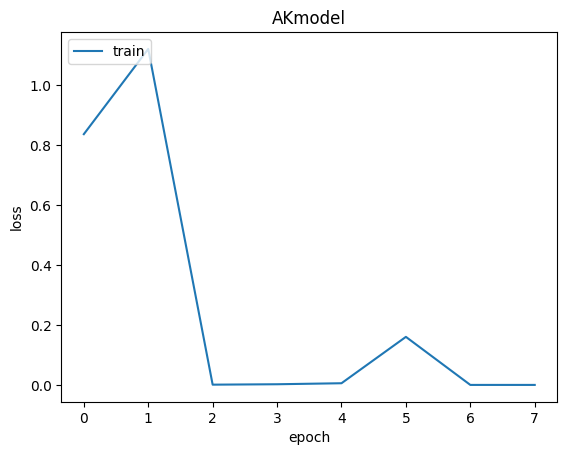

Found 851 validated image filenames belonging to 1 classes.
Found 212 validated image filenames belonging to 1 classes.
Epoch 1/8
14/14 [==============================] - 41s 3s/step - loss: 0.2628 - accuracy: 0.8954 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 2/8
14/14 [==============================] - 34s 2s/step - loss: 0.0087 - accuracy: 0.9988 - val_loss: 0.0191 - val_accuracy: 1.0000
Epoch 3/8
14/14 [==============================] - 33s 2s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0248 - val_accuracy: 1.0000
Epoch 4/8
14/14 [==============================] - 37s 3s/step - loss: 5.8780e-04 - accuracy: 1.0000 - val_loss: 0.0331 - val_accuracy: 1.0000
Epoch 5/8
14/14 [==============================] - 34s 2s/step - loss: 3.2230e-04 - accuracy: 1.0000 - val_loss: 0.0314 - val_accuracy: 1.0000
Epoch 6/8
14/14 [==============================] - 33s 2s/step - loss: 2.6853e-04 - accuracy: 1.0000 - val_loss: 0.0277 - val_accuracy: 1.0000
Epoch 7/8
14/14 [=================

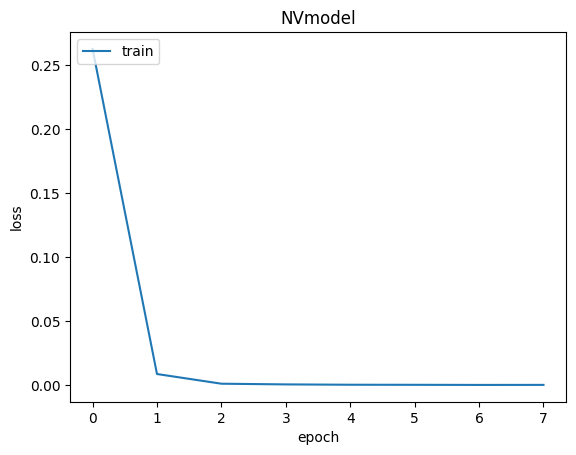

Found 1 validated image filenames belonging to 1 classes.
Found 0 validated image filenames belonging to 1 classes.
Epoch 1/8
1/1 [==============================] - ETA: 0s - loss: 1.6467 - accuracy: 0.0000e+00

1/1 [==============================] - 3s 3s/step - loss: 1.6467 - accuracy: 0.0000e+00
Epoch 2/8
1/1 [==============================] - ETA: 0s - loss: 0.5589 - accuracy: 1.0000

1/1 [==============================] - 0s 55ms/step - loss: 0.5589 - accuracy: 1.0000
Epoch 3/8
1/1 [==============================] - ETA: 0s - loss: 1.9021e-04 - accuracy: 1.0000

1/1 [==============================] - 0s 58ms/step - loss: 1.9021e-04 - accuracy: 1.0000
Epoch 4/8
1/1 [==============================] - ETA: 0s - loss: 0.0042 - accuracy: 1.0000

1/1 [==============================] - 0s 56ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 5/8
1/1 [==============================] - ETA: 0s - loss: 1.4429e-04 - accuracy: 1.0000

1/1 [==============================] - 0s 331ms/step - loss: 1.4429e-04 - accuracy: 1.0000
Epoch 6/8
1/1 [==============================] - ETA: 0s - loss: 0.1046 - accuracy: 1.0000

1/1 [==============================] - 0s 53ms/step - loss: 0.1046 - accuracy: 1.0000
Epoch 7/8
1/1 [==============================] - ETA: 0s - loss: 2.5899e-05 - accuracy: 1.0000

1/1 [==============================] - 0s 56ms/step - loss: 2.5899e-05 - accuracy: 1.0000
Epoch 8/8
1/1 [==============================] - ETA: 0s - loss: 1.5406e-05 - accuracy: 1.0000

1/1 [==============================] - 0s 56ms/step - loss: 1.5406e-05 - accuracy: 1.0000


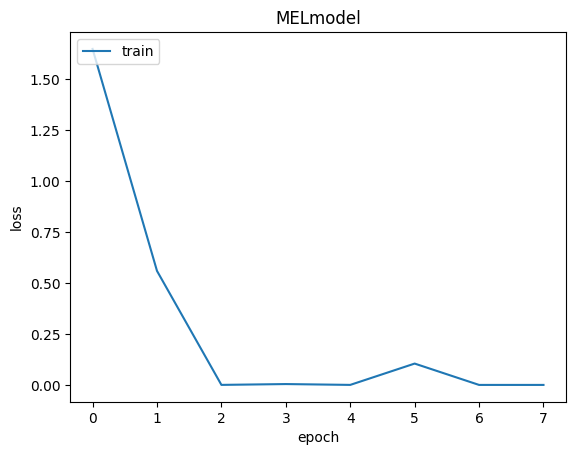

Found 1 validated image filenames belonging to 1 classes.
Found 0 validated image filenames belonging to 1 classes.
Epoch 1/8
1/1 [==============================] - ETA: 0s - loss: 0.4438 - accuracy: 1.0000

1/1 [==============================] - 3s 3s/step - loss: 0.4438 - accuracy: 1.0000
Epoch 2/8
1/1 [==============================] - ETA: 0s - loss: 0.4947 - accuracy: 1.0000

1/1 [==============================] - 0s 61ms/step - loss: 0.4947 - accuracy: 1.0000
Epoch 3/8
1/1 [==============================] - ETA: 0s - loss: 1.9971e-04 - accuracy: 1.0000

1/1 [==============================] - 0s 59ms/step - loss: 1.9971e-04 - accuracy: 1.0000
Epoch 4/8
1/1 [==============================] - ETA: 0s - loss: 8.2725e-04 - accuracy: 1.0000

1/1 [==============================] - 0s 57ms/step - loss: 8.2725e-04 - accuracy: 1.0000
Epoch 5/8
1/1 [==============================] - ETA: 0s - loss: 0.0211 - accuracy: 1.0000

1/1 [==============================] - 0s 55ms/step - loss: 0.0211 - accuracy: 1.0000
Epoch 6/8
1/1 [==============================] - ETA: 0s - loss: 0.0721 - accuracy: 1.0000

1/1 [==============================] - 0s 58ms/step - loss: 0.0721 - accuracy: 1.0000
Epoch 7/8
1/1 [==============================] - ETA: 0s - loss: 7.1800e-05 - accuracy: 1.0000

1/1 [==============================] - 0s 57ms/step - loss: 7.1800e-05 - accuracy: 1.0000
Epoch 8/8
1/1 [==============================] - ETA: 0s - loss: 3.1456e-05 - accuracy: 1.0000

1/1 [==============================] - 0s 66ms/step - loss: 3.1456e-05 - accuracy: 1.0000


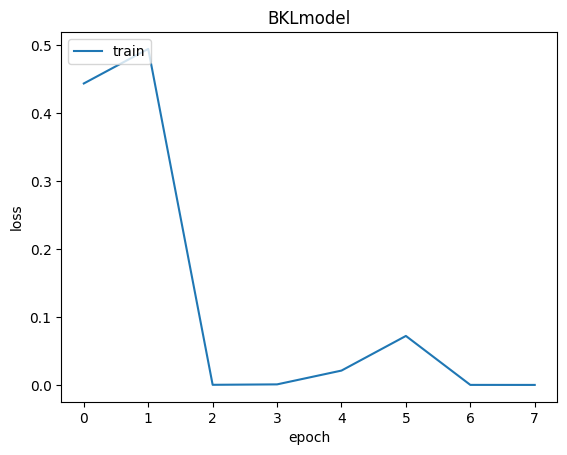

Found 1 validated image filenames belonging to 1 classes.
Found 0 validated image filenames belonging to 1 classes.
Epoch 1/8
1/1 [==============================] - ETA: 0s - loss: 0.2426 - accuracy: 1.0000

1/1 [==============================] - 3s 3s/step - loss: 0.2426 - accuracy: 1.0000
Epoch 2/8
1/1 [==============================] - ETA: 0s - loss: 0.1698 - accuracy: 1.0000

1/1 [==============================] - 0s 58ms/step - loss: 0.1698 - accuracy: 1.0000
Epoch 3/8
1/1 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000

1/1 [==============================] - 0s 55ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 4/8
1/1 [==============================] - ETA: 0s - loss: 4.1316e-04 - accuracy: 1.0000

1/1 [==============================] - 0s 56ms/step - loss: 4.1316e-04 - accuracy: 1.0000
Epoch 5/8
1/1 [==============================] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000

1/1 [==============================] - 0s 58ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 6/8
1/1 [==============================] - ETA: 0s - loss: 0.0425 - accuracy: 1.0000

1/1 [==============================] - 0s 53ms/step - loss: 0.0425 - accuracy: 1.0000
Epoch 7/8
1/1 [==============================] - ETA: 0s - loss: 2.8784e-05 - accuracy: 1.0000

1/1 [==============================] - 0s 56ms/step - loss: 2.8784e-05 - accuracy: 1.0000
Epoch 8/8
1/1 [==============================] - ETA: 0s - loss: 1.6050e-05 - accuracy: 1.0000

1/1 [==============================] - 1s 885ms/step - loss: 1.6050e-05 - accuracy: 1.0000


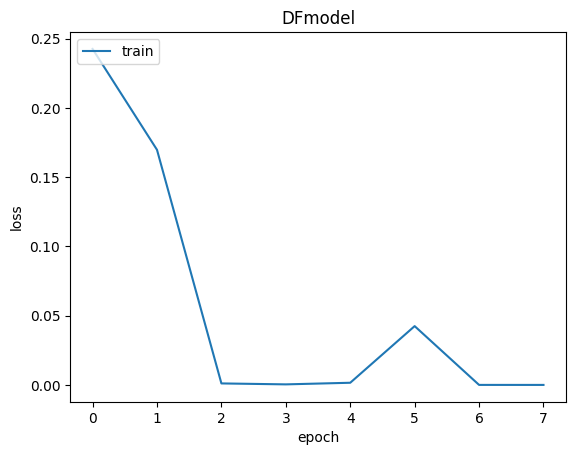

Found 1 validated image filenames belonging to 1 classes.
Found 0 validated image filenames belonging to 1 classes.
Epoch 1/8
1/1 [==============================] - ETA: 0s - loss: 0.1260 - accuracy: 1.0000

1/1 [==============================] - 5s 5s/step - loss: 0.1260 - accuracy: 1.0000
Epoch 2/8
1/1 [==============================] - ETA: 0s - loss: 0.1278 - accuracy: 1.0000

1/1 [==============================] - 1s 952ms/step - loss: 0.1278 - accuracy: 1.0000
Epoch 3/8
1/1 [==============================] - ETA: 0s - loss: 2.1478e-05 - accuracy: 1.0000

1/1 [==============================] - 1s 590ms/step - loss: 2.1478e-05 - accuracy: 1.0000
Epoch 4/8
1/1 [==============================] - ETA: 0s - loss: 4.8083e-04 - accuracy: 1.0000

1/1 [==============================] - 0s 326ms/step - loss: 4.8083e-04 - accuracy: 1.0000
Epoch 5/8
1/1 [==============================] - ETA: 0s - loss: 8.1028e-04 - accuracy: 1.0000

1/1 [==============================] - 0s 56ms/step - loss: 8.1028e-04 - accuracy: 1.0000
Epoch 6/8
1/1 [==============================] - ETA: 0s - loss: 0.4220 - accuracy: 1.0000

1/1 [==============================] - 0s 57ms/step - loss: 0.4220 - accuracy: 1.0000
Epoch 7/8
1/1 [==============================] - ETA: 0s - loss: 1.7993e-06 - accuracy: 1.0000

1/1 [==============================] - 0s 54ms/step - loss: 1.7993e-06 - accuracy: 1.0000
Epoch 8/8
1/1 [==============================] - ETA: 0s - loss: 2.5206e-05 - accuracy: 1.0000

1/1 [==============================] - 0s 58ms/step - loss: 2.5206e-05 - accuracy: 1.0000


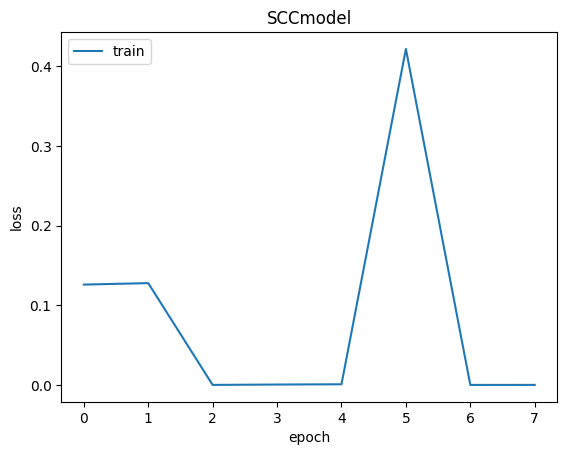

Found 1 validated image filenames belonging to 1 classes.
Found 0 validated image filenames belonging to 1 classes.
Epoch 1/8
1/1 [==============================] - ETA: 0s - loss: 1.8823 - accuracy: 0.0000e+00

1/1 [==============================] - 3s 3s/step - loss: 1.8823 - accuracy: 0.0000e+00
Epoch 2/8
1/1 [==============================] - ETA: 0s - loss: 1.0057 - accuracy: 0.0000e+00

1/1 [==============================] - 0s 323ms/step - loss: 1.0057 - accuracy: 0.0000e+00
Epoch 3/8
1/1 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000

1/1 [==============================] - 0s 85ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 4/8
1/1 [==============================] - ETA: 0s - loss: 8.1527e-04 - accuracy: 1.0000

1/1 [==============================] - 0s 90ms/step - loss: 8.1527e-04 - accuracy: 1.0000
Epoch 5/8
1/1 [==============================] - ETA: 0s - loss: 0.0078 - accuracy: 1.0000

1/1 [==============================] - 0s 95ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 6/8
1/1 [==============================] - ETA: 0s - loss: 0.0685 - accuracy: 1.0000

1/1 [==============================] - 0s 111ms/step - loss: 0.0685 - accuracy: 1.0000
Epoch 7/8
1/1 [==============================] - ETA: 0s - loss: 6.7790e-06 - accuracy: 1.0000

1/1 [==============================] - 2s 2s/step - loss: 6.7790e-06 - accuracy: 1.0000
Epoch 8/8
1/1 [==============================] - ETA: 0s - loss: 1.2646e-04 - accuracy: 1.0000

1/1 [==============================] - 1s 900ms/step - loss: 1.2646e-04 - accuracy: 1.0000


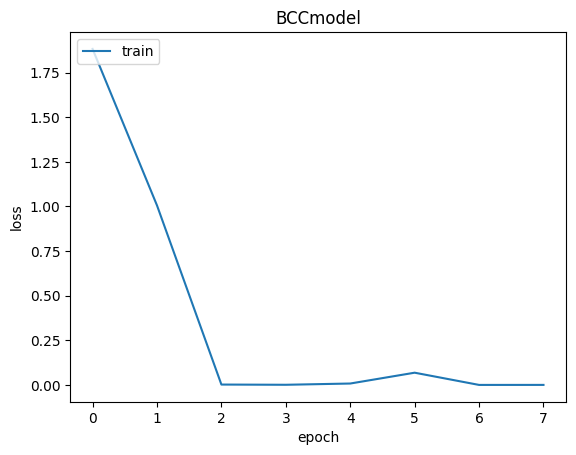

Found 1 validated image filenames belonging to 1 classes.
Found 0 validated image filenames belonging to 1 classes.
Epoch 1/8
1/1 [==============================] - ETA: 0s - loss: 0.1436 - accuracy: 1.0000

1/1 [==============================] - 2s 2s/step - loss: 0.1436 - accuracy: 1.0000
Epoch 2/8
1/1 [==============================] - ETA: 0s - loss: 0.1484 - accuracy: 1.0000

1/1 [==============================] - 0s 62ms/step - loss: 0.1484 - accuracy: 1.0000
Epoch 3/8
1/1 [==============================] - ETA: 0s - loss: 4.1860e-04 - accuracy: 1.0000

1/1 [==============================] - 1s 997ms/step - loss: 4.1860e-04 - accuracy: 1.0000
Epoch 4/8
1/1 [==============================] - ETA: 0s - loss: 1.2565e-04 - accuracy: 1.0000

1/1 [==============================] - 2s 2s/step - loss: 1.2565e-04 - accuracy: 1.0000
Epoch 5/8
1/1 [==============================] - ETA: 0s - loss: 0.2563 - accuracy: 1.0000

1/1 [==============================] - 1s 929ms/step - loss: 0.2563 - accuracy: 1.0000
Epoch 6/8
1/1 [==============================] - ETA: 0s - loss: 0.1100 - accuracy: 1.0000

1/1 [==============================] - 1s 638ms/step - loss: 0.1100 - accuracy: 1.0000
Epoch 7/8
1/1 [==============================] - ETA: 0s - loss: 5.1171e-07 - accuracy: 1.0000

1/1 [==============================] - 0s 284ms/step - loss: 5.1171e-07 - accuracy: 1.0000
Epoch 8/8
1/1 [==============================] - ETA: 0s - loss: 5.4391e-07 - accuracy: 1.0000

1/1 [==============================] - 0s 62ms/step - loss: 5.4391e-07 - accuracy: 1.0000


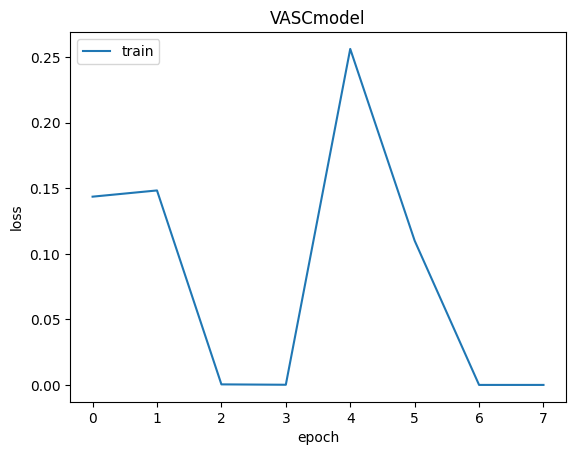

In [26]:
for i in tables.keys():

    create_model(tables[i], f"{i}model")


In [27]:

model_test = get_model()

model_test.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_85 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_85 (MaxPooli  (None, 64, 64, 16)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_85 (Ba  (None, 64, 64, 16)        64        
 tchNormalization)                                               
                                                                 
 dropout_85 (Dropout)        (None, 64, 64, 16)        0         
                                                                 
 conv2d_86 (Conv2D)          (None, 62, 62, 32)        4640      
                                                                 
 max_pooling2d_86 (MaxPooli  (None, 31, 31, 32)      